In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/RAJESH/Of_Cr.csv",index_col='timestamp')

In [4]:
def load_data(data, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(data)):
        X_train.append(data.iloc[i-seq_len : i, 0])
        y_train.append(data.iloc[i, 0])
    
    #1 last 720 days are going to be used in test
    X_test = X_train[8040:]             
    y_test = y_train[8040:]
    
    #2 first 8040 days are going to be used in training
    X_train = X_train[:8040]           
    y_train = y_train[:8040]
    
    #3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    #4 reshape data to input into RNN models
    X_train = np.reshape(X_train, (8040, seq_len, 1))
    
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]

In [5]:
#create train, test data
seq_len = 24 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (8040, 24, 1)
y_train.shape =  (8040,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [6]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [7]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
63/63 [==============================] - 2s 7ms/step - loss: 2.4088
Epoch 2/300
63/63 [==============================] - 0s 7ms/step - loss: 0.6473
Epoch 3/300
63/63 [==============================] - 0s 6ms/step - loss: 0.5031
Epoch 4/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4576
Epoch 5/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4382
Epoch 6/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4249
Epoch 7/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4160
Epoch 8/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4095
Epoch 9/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4059
Epoch 10/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4030
Epoch 11/300
63/63 [==============================] - 0s 7ms/step - loss: 0.4012
Epoch 12/300
63/63 [==============================] - 0s 6ms/step - loss: 0.4006
Epoch 13/300
63/63 [=================

In [8]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [13]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [14]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 0.5272268198068344
Root Mean Squared Error for RNN Model for testing is: 0.5441180566416798
Mean Absolute Error for RNN Model for training is: 0.41573032200595417
Mean Absolute Error for RNN Model for testing is: 0.4226221512286948
MAPE for RNN Model for training is: 0.14052701586460362
MAPE for RNN Model for testing is: 0.1403511498962567


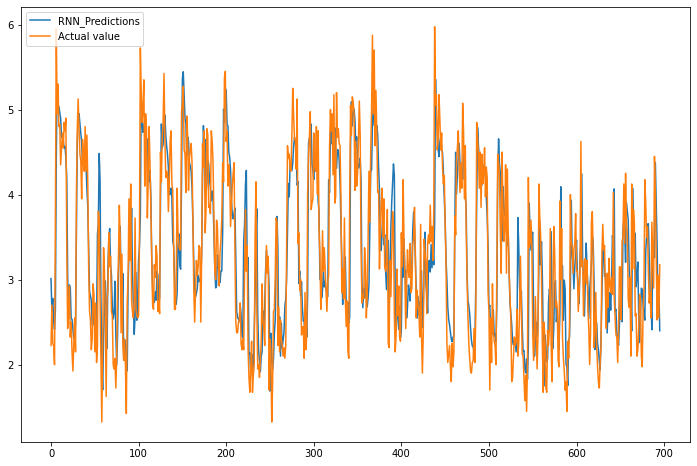

In [15]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [16]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([2.2249999]), array([3.0122027], dtype=float32))

In [18]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([-0.78720283]), array([0.06938672]), array([-0.52912235]), array([-0.28654504]), array([-0.413872]), array([1.08293176]), array([1.52738714]), array([-0.34843063]), array([0.2593298]), array([-0.23685932]), array([-0.13915157]), array([-0.54829073]), array([-0.12205887]), array([0.03706598]), array([-0.08279324]), array([0.30464411]), array([0.18367672]), array([0.469944]), array([-0.84434462]), array([-0.62093449]), array([-0.0283134]), array([-0.0123148]), array([-0.58131957]), array([-0.04672408]), array([-0.38272047]), array([-0.48815084]), array([-0.08331132]), array([0.23040271]), array([-0.33083415]), array([0.47209001]), array([0.15713072]), array([0.24102259]), array([-0.17661905]), array([-0.36010361]), array([-0.32764101]), array([-0.65815425]), array([0.29730225]), array([-0.01417589]), array([-0.14740753]), array([0.47808361]), array([-0.07447767]), array([0.64561129]), array([0.26961327]), array([-0.22979689]), array([-0.23911834]), array([-0.28138089]), array([-0.

In [19]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.3016572]), array([-1.65155482]))

In [20]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [21]:
len(neg),len(pos)

(384, 312)